# Resumo, Teoria e Prática - Metódo da Bisseção
> Autor: Gil Miranda<br>
> Contato: gilsmneto@gmail.com<br>
> Repo: http://www.gilmiranda.me<br>
> GitHub: [@mirandagil](https://github.com/mirandagil)<br>
> Fontes bibliográficas:
   * http://www.im.ufrj.br/bernardofpc/cursos/cientificaI/2017/Semana2-Parte2-Bissecao.ipynb
   
`last update: 26/02/2019`

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Teorema de Bolzano (caso particular do Teorema do Valor Intermediário)

Seja $f$ uma função contínua $f: [a,b]\rightarrow\mathbb{R}$ e $f(a) < 0 < f(b) $ então existe $z \in [a,b] $ tal que $f(z) = 0$<br>
<span style="color: #f2cf4a; font-family: Babas; font-size: .8em;">
`Referência: SPIVAK, M. 1967 Calculus. p. 100. Theorem 1.`
</span>

---
Vejamos o caso abaixo, onde<br>$f(x) = x^5 - 2$<br> $a = \frac{1}{2}$ e $b = \frac{3}{2}$<br>
O teorema garante que existe $ z = \sqrt[5]{2}$ tal que $f(z) = 0$

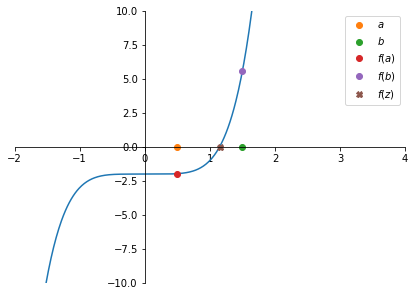

In [7]:
def f(x):
    return x**5-2

a = 1/2
b = 3/2
z = 2**(1/5)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,5))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
ax.set_ylim(-10,10)
ax.set_xlim(-2,4)

x = np.arange(-2,10,0.01)
ax.plot(x,f(x))
ax.plot(a,0,'o',label='$a$')
ax.plot(b,0,'o', label='$b$')
ax.plot(a,f(a),'o',label='$f(a)$')
ax.plot(b,f(b),'o', label='$f(b)$')
ax.plot(z,f(z),'X',label='$f(z)$')

ax.legend(loc='best')

O metódo da bisseção consiste em, determinar $z$, ou uma boa aproximação para $z$ ou um intervalo suficientemente pequeno que contenha $z$<br>
Utilizando o Teorema de bolzano, ou T.V.I. em um intervalo correto conseguimos garantir a existência de $z$ 
O método é feito da seguinte maneira:<br>
1. Tomar a função $f$ a ser bissectada, sendo $f$ contínua
1. Determinar um intervalo $[a,b]$ tal que $f(a) \cdot f(b) < 0$
1. Tomar $m = \frac{a+b}{2}$
1. Testar onde está $z$
    * $f(a)\cdot f(b) < 0 \implies z \in [a,m]$
    * $f(a)\cdot f(b) > 0 \implies z \in [m,b]$
    * $f(a)\cdot f(b) = 0 \implies z = a $ ou $ z = b$
1. Repetir os passos até o intervalo ser suficientemente pequeno, ou seja, dado uma tolerância tem-se: $|f(a)-f(b)| < tol$

### Oh o bicho vindo, montando o algoritmo da bisseção 

Dividiremos o algoritmo em duas partes que juntas completam o metódo da bisseção.<br>
A primeira parte `bissection_step(f,a,b)` recebe a função e um dado intervalo que contenha a raíz, e retorna um intervalo dividido ao meio, ou seja, faz um passo da bisseção.<br>
A segunda parte `bissection` fará a iteração do metódo até o intervalo ser satisfatoriamente pequeno, ou encontrar a raíz exata.<br>
Essa divisão se torna importante pois assim podemos criar mais de uma maneira de fazer a bisseção, sendo iterativa ou recursiva.<br>

###### bissection_step

In [8]:
def bissection_step(f, a, b):
    z = (a+b)/2
    if(f(z) == 0):
        return (z,z)
    elif (f(a)*f(z) < 0):
        return (a,z)
    elif (f(z)*f(b) < 0):
        return (z,b)

Função bem simples, tomamos a média do intervalo $[a,b]$ e verificamos se é raíz, se for retornamos o intervalo degenerado $[z,z]$<br>
Caso não seja raíz, verificamos se a raíz está em $[a,z]$ ou em $[z,b]$. Essa verificação é feita testando quais destes tem sinal oposto nos extremos, para reaplicar o TVI

##### bissection(f,a,b,tol,count,retsteps)

In [14]:
def bissection(f,a,b,tol=1e-6,count=0,retsteps=False):
    if f(a)*f(b) > 0:
         raise ValueError('Non-opposite signs for bissection')
    if f(a) == 0:
        if (retsteps):
            return (a,count)
        else:
            return a
    elif f(b) == 0:
        if (retsteps):
            return (b,count)
        else:
            return b
    else:  
        if (abs(b-a) <= tol):
            if (retsteps):
                return ((b+a)/2,count)
            else:
                return (b+a)/2
        else:
            a, b = bissection_step(f, a, b)
            count += 1
            return bissecao(f, a, b, tol, count, retsteps)

Já de inicio tratamos um erro, e se o intervalo não possuir raíz?<br>
Depois verificamos se algum dos extermos é raíz, com tudo isso feito podemos partir para o algoritmo recursivo<br>
Se já estivermos abaixo da tolerância, retorna o ponto. Caso não, escolhemos o próximo intervalo $[a,b]$ com a `bissection_step` e chamamos por recursão a própria `bissection`

A Bisseção acima está um pouco mais robusta que o usual, dá para obter o mesmo resultado de maneira satisfatória com uma bisseção muito mais simples.<br>
O único motivo da função um pouco mais complicada é a robustez de e liberdade:
- Tratamento de erro, se o intervalo dado não tiver sinais oposto já é acusado um erro, impedindo que o algoritmo fique em um loop, ou dê uma resposta errada
- Verificar antes se algum ponto dos extermos é a raíz, evitando assim rodar o algoritmo desnecessariamente
- Liberdade na escolha de retornar ou não o número de iterações

In [12]:
def bissecao_simples(f,a,b, tol=1e-8):
    # YOUR CODE HERE
    count = 0
    while b-a >= tol:
        count += 1
        z = (a+b)/2
        if f(z) == 0:
            return z, count
        if f(a)*f(z) < 0:
            b = z
        else:
            a = z
    return z, count

Aplicando o metódo para encontrar a raíz do exemplo
$f = x^5 - 2$

In [13]:
raiz, c = bissection(f,a,b,retsteps=True, tol=1e-10)
assert (z-raiz < 1e-10)
(z,raiz,z-raiz, c)

(1.148698354997035, 1.1486983549839351, 1.3099965556762072e-11, 34)